In [2]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict, Literal

In [6]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str


In [ ]:
def show_equation(state: QuadState) -> QuadState:
    a, b, c = state['a'], state['b'], state['c']
    state['equation'] = f"{a}x² {b}x + {c} = 0"
    return state

In [21]:
def calculate_discriminant(state: QuadState) -> QuadState:
    state['discriminant'] = state['b'] ** 2 - 4 * state['a'] * state['c']
    return state

In [25]:
def real_roots(state:QuadState)->QuadState:
    root1 = (-state['b'] + state['discriminant'] ** 0.5) / (2 * state['a'])
    root2 = (-state['b'] - state['discriminant'] ** 0.5) / (2 * state['a'])
    result = f"The roots are {root1} and {root2}"
    return {'result': result}

In [26]:
def repeated_root(state:QuadState)->QuadState:
    root = -state['b'] / (2 * state['a'])
    result = f"The repeated root is {root}"
    return {'result': result}

In [27]:
def no_real_roots(state:QuadState)->QuadState:
    result = "There are no real roots."
    return {'result': result}

In [28]:
# Check Condition
def check_condition(state: QuadState) -> Literal["real_roots", "repeated_root", "no_real_roots"]:
    disc = state['discriminant']
    if disc > 0:
        return "real_roots"
    elif disc == 0:
        return "repeated_root"
    else:
        return "no_real_roots"

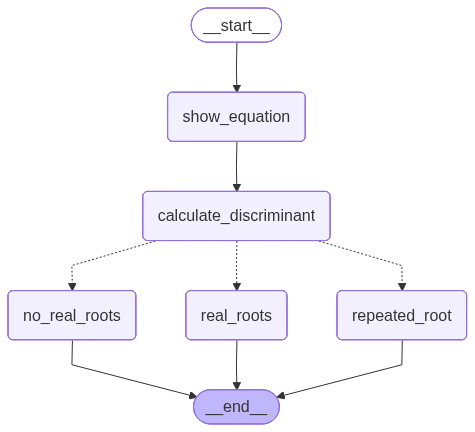

In [29]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_root', repeated_root)
graph.add_node('no_real_roots', no_real_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_root', END)
graph.add_edge('no_real_roots', END)

workflow= graph.compile()
workflow


In [34]:
initial_state = {
    'a': 2,
    'b': 4,
    'c': 2,
}
final_state = workflow.invoke(initial_state)
print(final_state)

{'a': 2, 'b': 4, 'c': 2, 'equation': '2x² 4x 2 = 0', 'discriminant': 0, 'result': 'The repeated root is -1.0'}
